### Import libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

import matplotlib
font = {'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

### Load data

In [3]:
data = pd.read_csv("Figure2-3-S2-double_mutant_validation.csv")
data

,Mutant,Expression_rep1,Expression_rep2,Binding_rep1,Binding_rep2,TLMutation,TL_percent,EVMutation,EV_percent,DeepSeq,DeepSeq_percent,Class,Color,TL_fold0,TL_fold1,TL_fold2,TL_fold3,TL_fold4
0,WT,1.156660,0.843340,1.023075,0.976925,NaN,NaN,NaN,NaN,NaN,NaN,WT,grey,NaN,NaN,NaN,NaN,NaN
1,F28D; A46W,0.745019,0.763487,0.023874,0.105803,-18.076826,0.999662,-17.960366,0.995714,-28.863635,0.986305,neg_control,crimson,-15.786639,-18.076826,-18.076826,-18.101686,-15.824563
2,Y50P; W349P,0.997041,0.927166,0.054720,0.202464,-17.016798,0.998548,-16.943444,0.986788,-21.973219,0.892830,neg_control,crimson,-10.636222,-11.440193,-10.694138,-13.658496,-11.440193
3,E75K; N394D,1.057647,0.843297,1.157251,1.211598,3.339824,0.000493,-1.900263,0.028570,-0.100751,0.013544,top1,royalblue,0.388158,-0.595151,0.302469,-0.615753,-0.615757
4,D67A;A387N,0.992135,0.925720,1.077320,0.967616,5.997397,0.000002,6.489677,0.000003,5.860262,0.000092,top1,royalblue,2.932764,2.821391,2.733569,2.545163,2.654022
5,N90D;R514K,0.958774,0.944211,1.669795,1.490177,5.032539,0.000025,-5.387709,0.149803,-5.154831,0.124252,top1,royalblue,-1.795245,-3.354939,2.281159,-3.402038,-3.377958
6,A387N; S511Q,1.058588,0.834387,1.019664,1.020921,5.586625,0.000007,-2.930621,0.049975,-6.103829,0.161441,top1,royalblue,-0.483490,-5.873912,-0.483490,-5.873912,-5.873912
7,N394D; S511Q,1.099153,1.022185,1.026274,0.990713,5.383255,0.000012,-5.241368,0.141629,-7.616584,0.228458,top1,royalblue,-0.736253,-6.383886,-0.736253,-6.383886,-6.383886
8,N61K; N330K,1.086917,0.983730,1.717869,1.893085,1.791659,0.005175,0.437857,0.004052,0.642944,0.008294,top1,royalblue,1.083437,-0.598765,1.069638,-0.598765,-0.598765
9,L91P; N330Y,1.249711,1.138712,2.399121,2.881767,2.001828,0.004014,-2.660733,0.043210,-0.472655,0.016925,top1,royalblue,2.019087,-0.142242,2.019087,-0.142242,-0.118387


TLMutation, R2: 0.516 +/- 0.032
EVMutation, R2: 0.088 +/- 0.004
DeepSeq, R2: 0.230 +/- 0.010


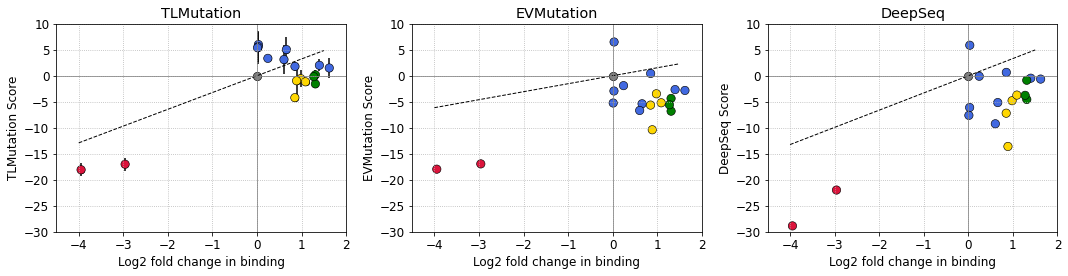

In [5]:
plt.figure(figsize=(15,4))

bind_average = data[['Binding_rep1', 'Binding_rep2']].mean(axis=1)

method = ['TLMutation', 'EVMutation', 'DeepSeq']
for i,j in zip(method,range(len(method))):
    plt.subplot(1,3,j+1)
    
    # plot double mutant binding affinity against VEP prediction score
    plt.scatter(np.log2(bind_average), data[i], c=data["Color"], edgecolor='k', linewidth=0.6, s=70)
    
    # WT datapoint
    plt.scatter(0,0, c='grey', edgecolor='k', linewidth=0.6, s=70)
    
    #fit a linear line of best fit
    y = data.dropna()[i]
    x = np.log2(data.dropna()[['Binding_rep1', 'Binding_rep2']].mean(axis=1))
    A = x[:,np.newaxis]
    slope, _, _, _ = np.linalg.lstsq(A, y)
    
    x_range = [-4, 1.5]
    plt.plot(x_range, slope*x_range, '--k', linewidth=1)
    
    
    #calculate r2 without y-intercept
    y_expected = x*slope
    r2 = np.sum(y_expected**2) / np.sum(y**2)
    
    #calculate variance in r2 by leave-one-out approach 
    leave_one_out_r2 = []
    for k in range(len(x.values)):
        x_temp = np.delete(x.values, k)
        y_temp = np.delete(y.values, k)
        
        y_temp_expected = x_temp * slope
        r2_temp = np.sum(y_temp_expected**2) / np.sum(y_temp**2)
        leave_one_out_r2.append(r2_temp)
    
    print(f"{i}, R2: {r2:.3f} +/- {np.std(leave_one_out_r2):.3f}")
    
    # plot parameters
    plt.grid(linestyle=":")
    
    plt.xlim([-4.5,2])
    plt.ylim([-30,10])
    
    plt.xticks(range(-4,3,1))
    plt.yticks(range(-30,11,5))
    
    plt.plot([0,0],[-30,10], c='gray', linewidth=0.75)
    plt.plot([-5,2],[0,0], c='gray', linewidth=0.75)
    
    plt.title(i)
    plt.xlabel("Log2 fold change in binding")
    plt.ylabel(f"{i} Score")
    
#plot prediction based on folds as error bars on TLmutation subplot
plt.subplot(1,3,1)
TL_predicted_std = data[['TL_fold0', 'TL_fold1', 'TL_fold2', 'TL_fold3', 'TL_fold4']].std(axis=1)
plt.errorbar(np.log2(bind_average), data["TLMutation"], yerr=TL_predicted_std, fmt="o", c='k', zorder=-1)

plt.tight_layout()
plt.show()